In [1]:

## importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)


In [2]:
##
## Crea un DataFrame a partir del archivo fligths.csv
##
flights = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/flights.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

In [ ]:
pd.read_

In [3]:
flights.describe()

          Year    Month    DayofMonth     DayOfWeek       DepTime  \
count  99999.0  99999.0  99999.000000  99999.000000  98857.000000   
mean    2008.0      1.0     17.087741      3.890059   1355.194827   
std        0.0      0.0      8.356321      1.953000    464.088277   
min     2008.0      1.0      1.000000      1.000000      1.000000   
25%     2008.0      1.0     10.000000      2.000000    942.000000   
50%     2008.0      1.0     17.000000      4.000000   1344.000000   
75%     2008.0      1.0     24.000000      5.000000   1743.000000   
max     2008.0      1.0     31.000000      7.000000   2359.000000   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  99999.000000  98697.000000  99999.000000  99999.000000   
mean    1341.983470   1492.730964   1502.593996   1510.586886   
std      451.355345    496.372525    478.096654   1185.974280   
min      600.000000      1.000000      5.000000      1.000000   
25%      940.000000   1114.000000   1120.000000    50

In [4]:
flights[['UniqueCarrier', 'FlightNum', 'DepDelay', 'ArrDelay', 'Distance']].head(5)

  UniqueCarrier  FlightNum  DepDelay  ArrDelay  Distance
0            WN        335       8.0     -14.0       810
1            WN       3231      19.0       2.0       810
2            WN        448       8.0      14.0       515
3            WN       1746      -4.0      -6.0       515
4            WN       3920      34.0      34.0       515

In [5]:
## Número total de registros leidos

numTotalFlights = len(flights)
numTotalFlights

99999

### Cálculos usando funciones de los DataFrames

#### Cómputo del porcentaje de vuelos retrasados

In [6]:
delayedFlights = flights[flights["DepDelay"] > 15][["UniqueCarrier", "DepDelay"]]
delayedFlights.head(5)

   UniqueCarrier  DepDelay
1             WN      19.0
4             WN      34.0
5             WN      25.0
6             WN      67.0
11            WN      94.0

In [7]:
## Porcentaje de vuelos retrasados

numDelayedFlights = len(delayedFlights)
print("Porcenaje de vuelos retrasados: " + str(round(numDelayedFlights / numTotalFlights*100)) + "%")

Porcenaje de vuelos retrasados: 20%


## Creación de variables usando funciones de usuario

In [8]:
flightsWithDelays = flights[["Year",
                          "Month",
                          "DayofMonth",
                          "UniqueCarrier",
                          "FlightNum",
                          "DepDelay"]].copy()

flightsWithDelays["IsDelayed"] = flightsWithDelays["DepDelay"].copy()
flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(lambda x: 1 if x > 15 else 0)
flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(lambda x: 0 if np.isnan(x) else x)


flightsWithDelays[["DepDelay", "IsDelayed"]].head(10)

   DepDelay  IsDelayed
0       8.0          0
1      19.0          1
2       8.0          0
3      -4.0          0
4      34.0          1
5      25.0          1
6      67.0          1
7      -1.0          0
8       2.0          0
9       0.0          0

In [9]:
## A continuación, se calcula el porcentaje de vuelos con retrasos

flightsWithDelays.IsDelayed.sum() / flightsWithDelays.DepDelay.count()

0.19813467938537482

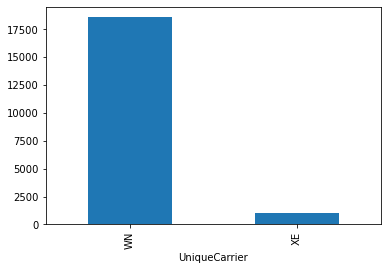

In [10]:
#
# Retrasos por transportador
import matplotlib.pyplot as plt

%matplotlib inline
flights["IsDelayed"] = flights["DepDelay"].copy()
flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: 1 if x>15 else 0 )
flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: 0 if np.isnan(x) else x)
(flights.groupby("UniqueCarrier").sum())["IsDelayed"].plot.bar();

## Retrasos por día de la semana

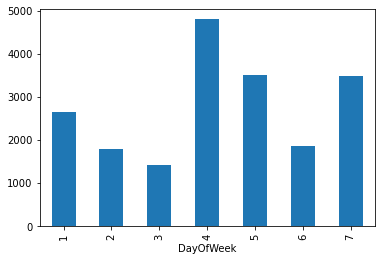

In [11]:
##
## Compute los retrasos por dia de la semana
##
(flights.groupby("DayOfWeek").sum())["IsDelayed"].plot.bar()

## Retrasos por hora del día

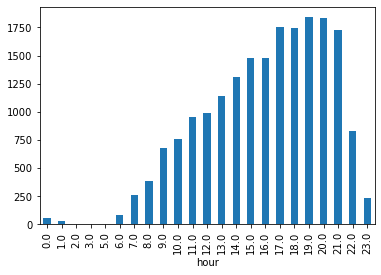

In [12]:
##
## Compute los retrasos por hora del día
##

flights["hour"] = flights["DepTime"].copy()
flights["hour"] = flights["hour"].map(lambda x: int(x/100) if not np.isnan(x) else x)
(flights.groupby("hour").sum())["IsDelayed"].plot.bar()

In [2]:
from scipy.interpolate import interp1d

In [4]:
x = (0,958)
y = (10, 1204)

In [23]:
f1 = interp1d(x, y)

In [11]:
xnew = (5)

In [21]:
xnew = np.linspace(0, 10, num =11, endpoint = True)

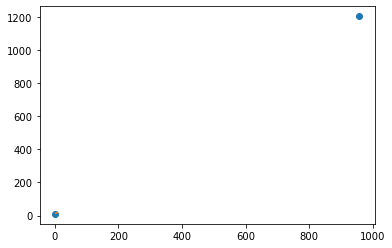

In [22]:
import matplotlib.pyplot as plt
plt.plot(x, y, "o", xnew, f1(xnew), "--")
plt.show()

In [1]:
import pandas as pd
import numpy as np

In [23]:
s = pd.Series([2.5, np.nan, 3.9], index = [10, 13, 15])

In [24]:
s.interpolate(method = "index")

10    2.50
13    3.34
15    3.90
dtype: float64

In [38]:
from sympy import *
x = symbols('x')
from sympy import roots, solve_poly_system

solve(17.85*x**3 + 532.155*x**2 -5523, x)
          


[-29.4559984843841 - 0.e-22*I,
 -3.42422291435688 + 0.e-22*I,
 3.06761635672416 - 0.e-22*I]

In [39]:
0.e-22*I

0